# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC

# Loading Data and Replacing Zeros with NaNs

In [2]:
df_train = pd.read_csv("/content/sample_data/diabetes.csv",na_values = {'Glucose':0,
                                    'BloodPressure':0,
                                    'SkinThickness':0,
                                    'Insulin':0,
                                    'BMI':0})

# Data Exploration

In [3]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
df_train.shape

(768, 9)

In [5]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [7]:
df_train.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
# Check number of missing values
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

Glucose            5
BMI               11
BloodPressure     35
SkinThickness    227
Insulin          374
dtype: int64

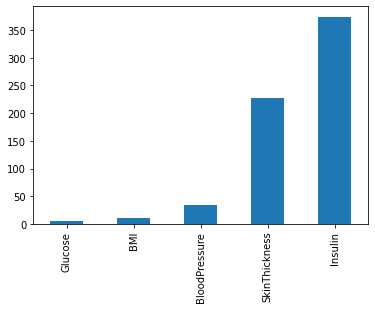

In [9]:
missing.plot.bar()

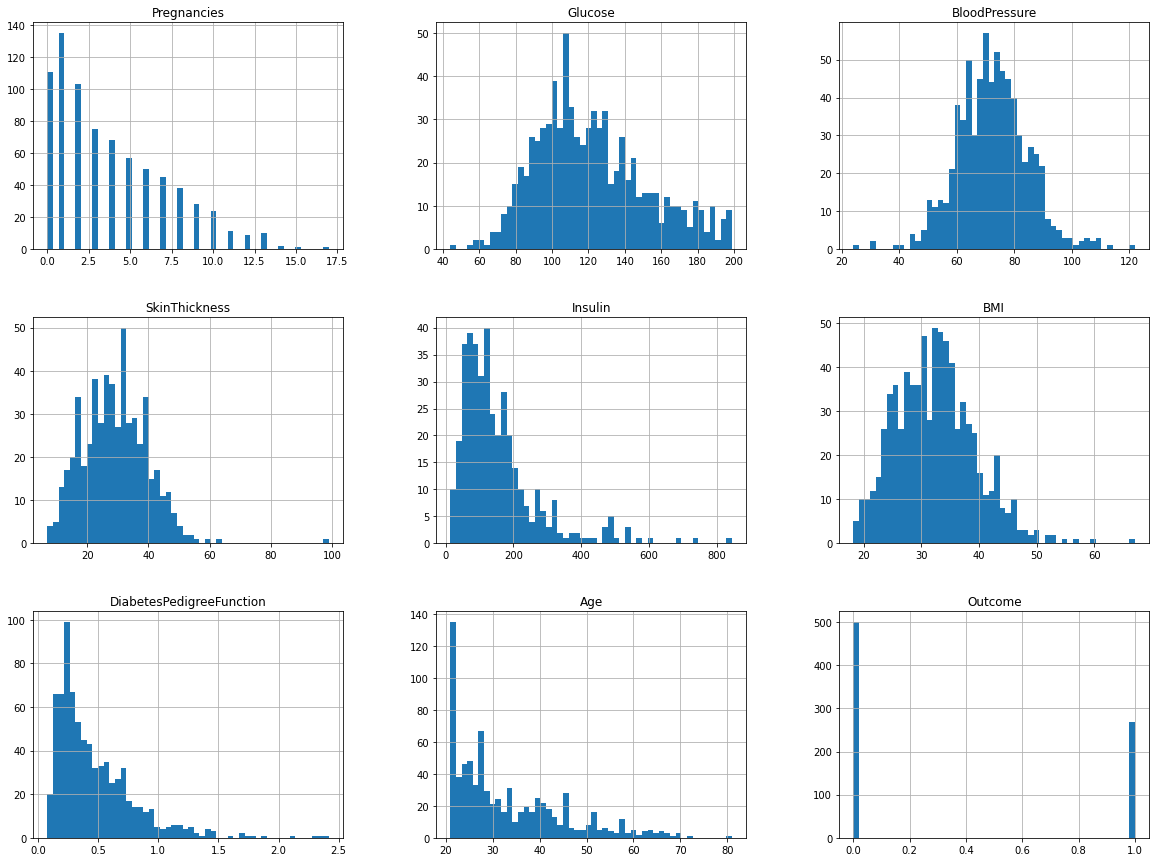

In [10]:
# Check Data Distribution
df_train.hist(bins = 50, figsize = (20,15))
plt.show()

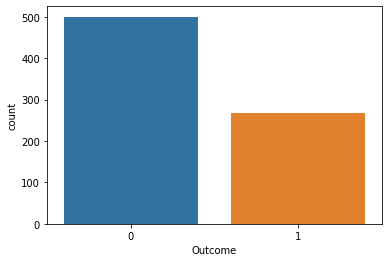

In [11]:
fig = sns.countplot(x='Outcome', data=df_train)

# Filling the Missing Values

# Add derived Features 

In [12]:
colors = ['#F06E5C','#5CF0C5','#F1F689','#F0B35C','#6EDEDE',
          '#BB81D5','#D3D972','#EB83EE','#8B8CED','#F09674',
          '#BCE374','#72C3E7','#C3A0EB','#E6809D','#A9BFCB']

In [13]:
df_train["Glucose_Cat"] = df_train["Glucose"].apply(lambda x: "Normal" if x < 140 else ("Prediabetes" if 140 <= x <= 199 else "Risk"))

data = go.Bar(x = df_train.groupby('Glucose_Cat').agg({'Glucose':'mean'}).reset_index()['Glucose_Cat'],
              y = df_train.groupby('Glucose_Cat').agg({'Glucose':'mean'}).reset_index()['Glucose'],
              text = round(df_train.groupby('Glucose_Cat').agg({'Glucose':'mean'}).reset_index()['Glucose'],3),
              textposition= 'auto',
              marker = dict(color = colors,line_color = 'white',line_width=2))

layout = go.Layout(title={'text': 'Average Glucose by Glucose Categories',
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis = dict(title='Glucose_Cat'),
                   yaxis =dict(title='Glucose'),
                   template = 'ggplot2')

fig=go.Figure(data=data, layout=layout)
iplot(fig)

In [14]:
df_train['Preg_Rate'] = df_train['Pregnancies'] / df_train['Age']

data = go.Bar(x = df_train.groupby('Outcome').agg({'Preg_Rate':'mean'}).reset_index()['Outcome'],
              y = df_train.groupby('Outcome').agg({'Preg_Rate':'mean'}).reset_index()['Preg_Rate'],
              text = round(df_train.groupby('Outcome').agg({'Preg_Rate':'mean'}).reset_index()['Preg_Rate'],3),
              textposition= 'auto',
              marker = dict(color = colors,
                            line_color = 'white',
                            line_width=2))

layout = go.Layout(title={'text': 'Average Pregnancy Rate by Outcome','y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                   xaxis = dict(title='Outcome'),
                   yaxis =dict(title='Preg_Rate'),
                   template = 'ggplot2')

fig=go.Figure(data=data, layout=layout)
iplot(fig)

In [15]:
df_train["Insulin_Cat"] = df_train["Insulin"].apply(lambda x: "Normal" if (16 <= x <= 166) else "Abnormal")

data = go.Bar(x = df_train.groupby('Insulin_Cat').agg({'Insulin':'mean'}).reset_index()['Insulin_Cat'],
              y = df_train.groupby('Insulin_Cat').agg({'Insulin':'mean'}).reset_index()['Insulin'],
              text = round(df_train.groupby('Insulin_Cat').agg({'Insulin':'mean'}).reset_index()['Insulin'],3),
              textposition= 'auto',
              marker = dict(color = colors,
                            line_color = 'white',
                            line_width=2))

layout = go.Layout(title={'text': 'Average Insulin by Insulin Categories','y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                   xaxis = dict(title='Insulin_Cat'),
                   yaxis =dict(title='Insulin'),
                   template = 'ggplot2')

fig=go.Figure(data=data, layout=layout)
iplot(fig)

# Fill NA Values

In [16]:
# Fill NA of the column specified with the median and use specific columns to group by 
df_train['Glucose'] = df_train['Glucose'].fillna(df_train.groupby('Outcome')['Glucose'].transform('median'))
df_train['BMI'] = df_train['BMI'].fillna(df_train.groupby('Outcome')['BMI'].transform('median'))
df_train['Insulin'] = df_train['Insulin'].fillna(df_train.groupby(['Outcome','Glucose_Cat'])['Insulin'].transform('median'))
df_train['Insulin'] = df_train['Insulin'].fillna(df_train['Insulin'].median())
df_train['SkinThickness'] = df_train['SkinThickness'].fillna(df_train.groupby(['Outcome','Glucose_Cat'])['SkinThickness'].transform('mean'))
df_train['BloodPressure'] = df_train['BloodPressure'].fillna(df_train.groupby(['Outcome','Age','Glucose_Cat'])['BloodPressure'].transform('median'))
df_train['BloodPressure'] = df_train['BloodPressure'].fillna(df_train['BloodPressure'].median())

In [17]:
df_train['Insulin']

0      203.5
1       94.0
2      203.5
3       94.0
4      168.0
       ...  
763    180.0
764     94.0
765    112.0
766    147.5
767     94.0
Name: Insulin, Length: 768, dtype: float64

In [18]:
bmi_labels = ['Underweight','Healthy Weight','Overweight','Obesity']

df_train['BMI_Cat'] = pd.cut(df_train['BMI'],[0,18.5,25,30,df_train['BMI'].max()],labels=bmi_labels)

data = go.Bar(x = df_train.groupby('BMI_Cat').agg({'BMI':'mean'}).reset_index()['BMI_Cat'],
              y = df_train.groupby('BMI_Cat').agg({'BMI':'mean'}).reset_index()['BMI'],
              text = round(df_train.groupby('BMI_Cat').agg({'BMI':'mean'}).reset_index()['BMI'],3),
              textposition= 'auto',
              marker = dict(color = colors,
                            line_color = 'white',
                            line_width=2))

layout = go.Layout(title={'text': 'Average BMI by BMI Categories',
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis = dict(title='BMI_Cat'),
                   yaxis =dict(title='BMI'),
                   template = 'ggplot2')

fig=go.Figure(data=data, layout=layout)
iplot(fig)

In [19]:
#Checking that there are not any missing values  
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

Series([], dtype: int64)

In [20]:
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Cat,Preg_Rate,Insulin_Cat,BMI_Cat
0,6,148.0,72.0,35.000000,203.5,33.6,0.627,50,1,Prediabetes,0.120000,Abnormal,Obesity
1,1,85.0,66.0,29.000000,94.0,26.6,0.351,31,0,Normal,0.032258,Abnormal,Overweight
2,8,183.0,64.0,33.468085,203.5,23.3,0.672,32,1,Prediabetes,0.250000,Abnormal,Healthy Weight
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21,0,Normal,0.047619,Normal,Overweight
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33,1,Normal,0.000000,Abnormal,Obesity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.0,32.9,0.171,63,0,Normal,0.158730,Abnormal,Obesity
764,2,122.0,70.0,27.000000,94.0,36.8,0.340,27,0,Normal,0.074074,Abnormal,Obesity
765,5,121.0,72.0,23.000000,112.0,26.2,0.245,30,0,Normal,0.166667,Normal,Overweight
766,1,126.0,60.0,32.392857,147.5,30.1,0.349,47,1,Normal,0.021277,Abnormal,Obesity


# Check the Correlation of the variables

In [21]:
correlation_matrix = df_train.corr()
correlation_matrix["Outcome"].sort_values(ascending = False)
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Preg_Rate
Pregnancies,1.000000,0.130155,0.214827,0.094373,0.059821,0.023890,-0.033523,0.544341,0.221898,0.920143
Glucose,0.130155,1.000000,0.227738,0.253567,0.578703,0.236171,0.138353,0.268910,0.495990,0.045904
BloodPressure,0.214827,0.227738,1.000000,0.202061,0.099416,0.285980,0.004008,0.333885,0.168099,0.107914
SkinThickness,0.094373,0.253567,0.202061,1.000000,0.218390,0.565817,0.104330,0.143589,0.305705,0.051465
Insulin,0.059821,0.578703,0.099416,0.218390,1.000000,0.249602,0.147390,0.156310,0.371153,0.010378
BMI,0.023890,0.236171,0.285980,0.565817,0.249602,1.000000,0.152771,0.027849,0.315577,-0.008616
DiabetesPedigreeFunction,-0.033523,0.138353,0.004008,0.104330,0.147390,0.152771,1.000000,0.033561,0.173844,-0.060263
Age,0.544341,0.268910,0.333885,0.143589,0.156310,0.027849,0.033561,1.000000,0.238356,0.258233
Outcome,0.221898,0.495990,0.168099,0.305705,0.371153,0.315577,0.173844,0.238356,1.000000,0.163744
Preg_Rate,0.920143,0.045904,0.107914,0.051465,0.010378,-0.008616,-0.060263,0.258233,0.163744,1.000000


In [22]:
correlation_matrix["Outcome"].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.495990
Insulin                     0.371153
BMI                         0.315577
SkinThickness               0.305705
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.168099
Preg_Rate                   0.163744
Name: Outcome, dtype: float64

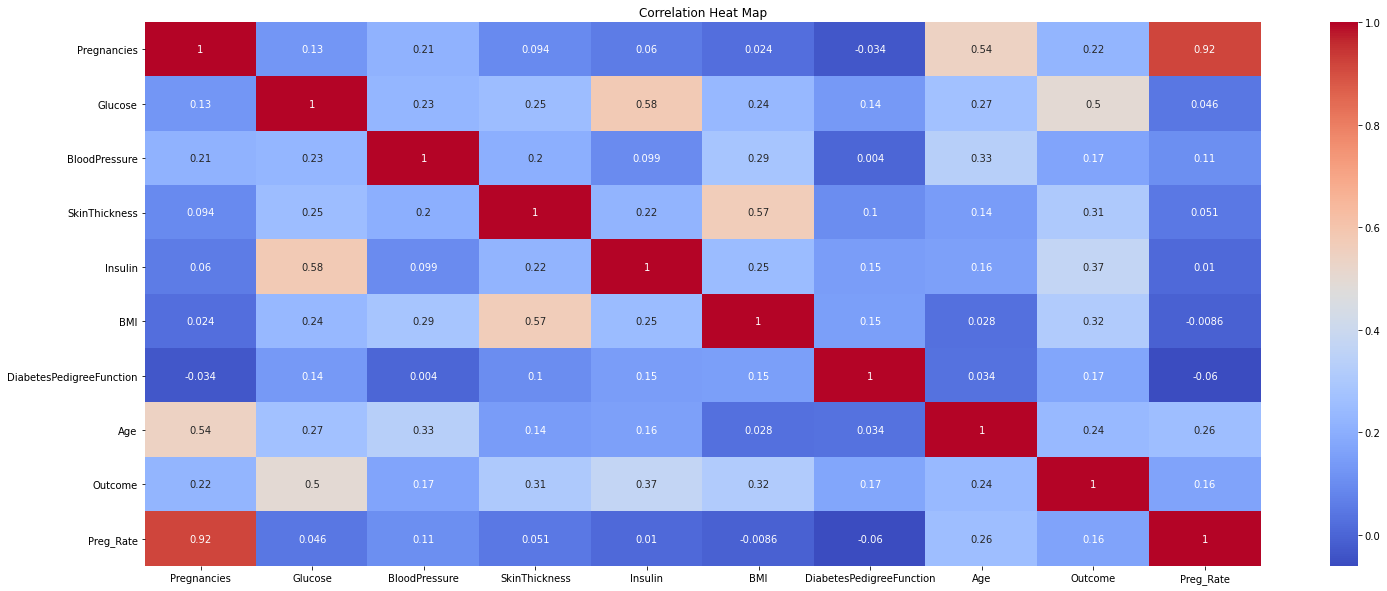

In [23]:
fig,ax= plt.subplots(figsize=(25,10))
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=True)
plt.title('Correlation Heat Map')
plt.show()

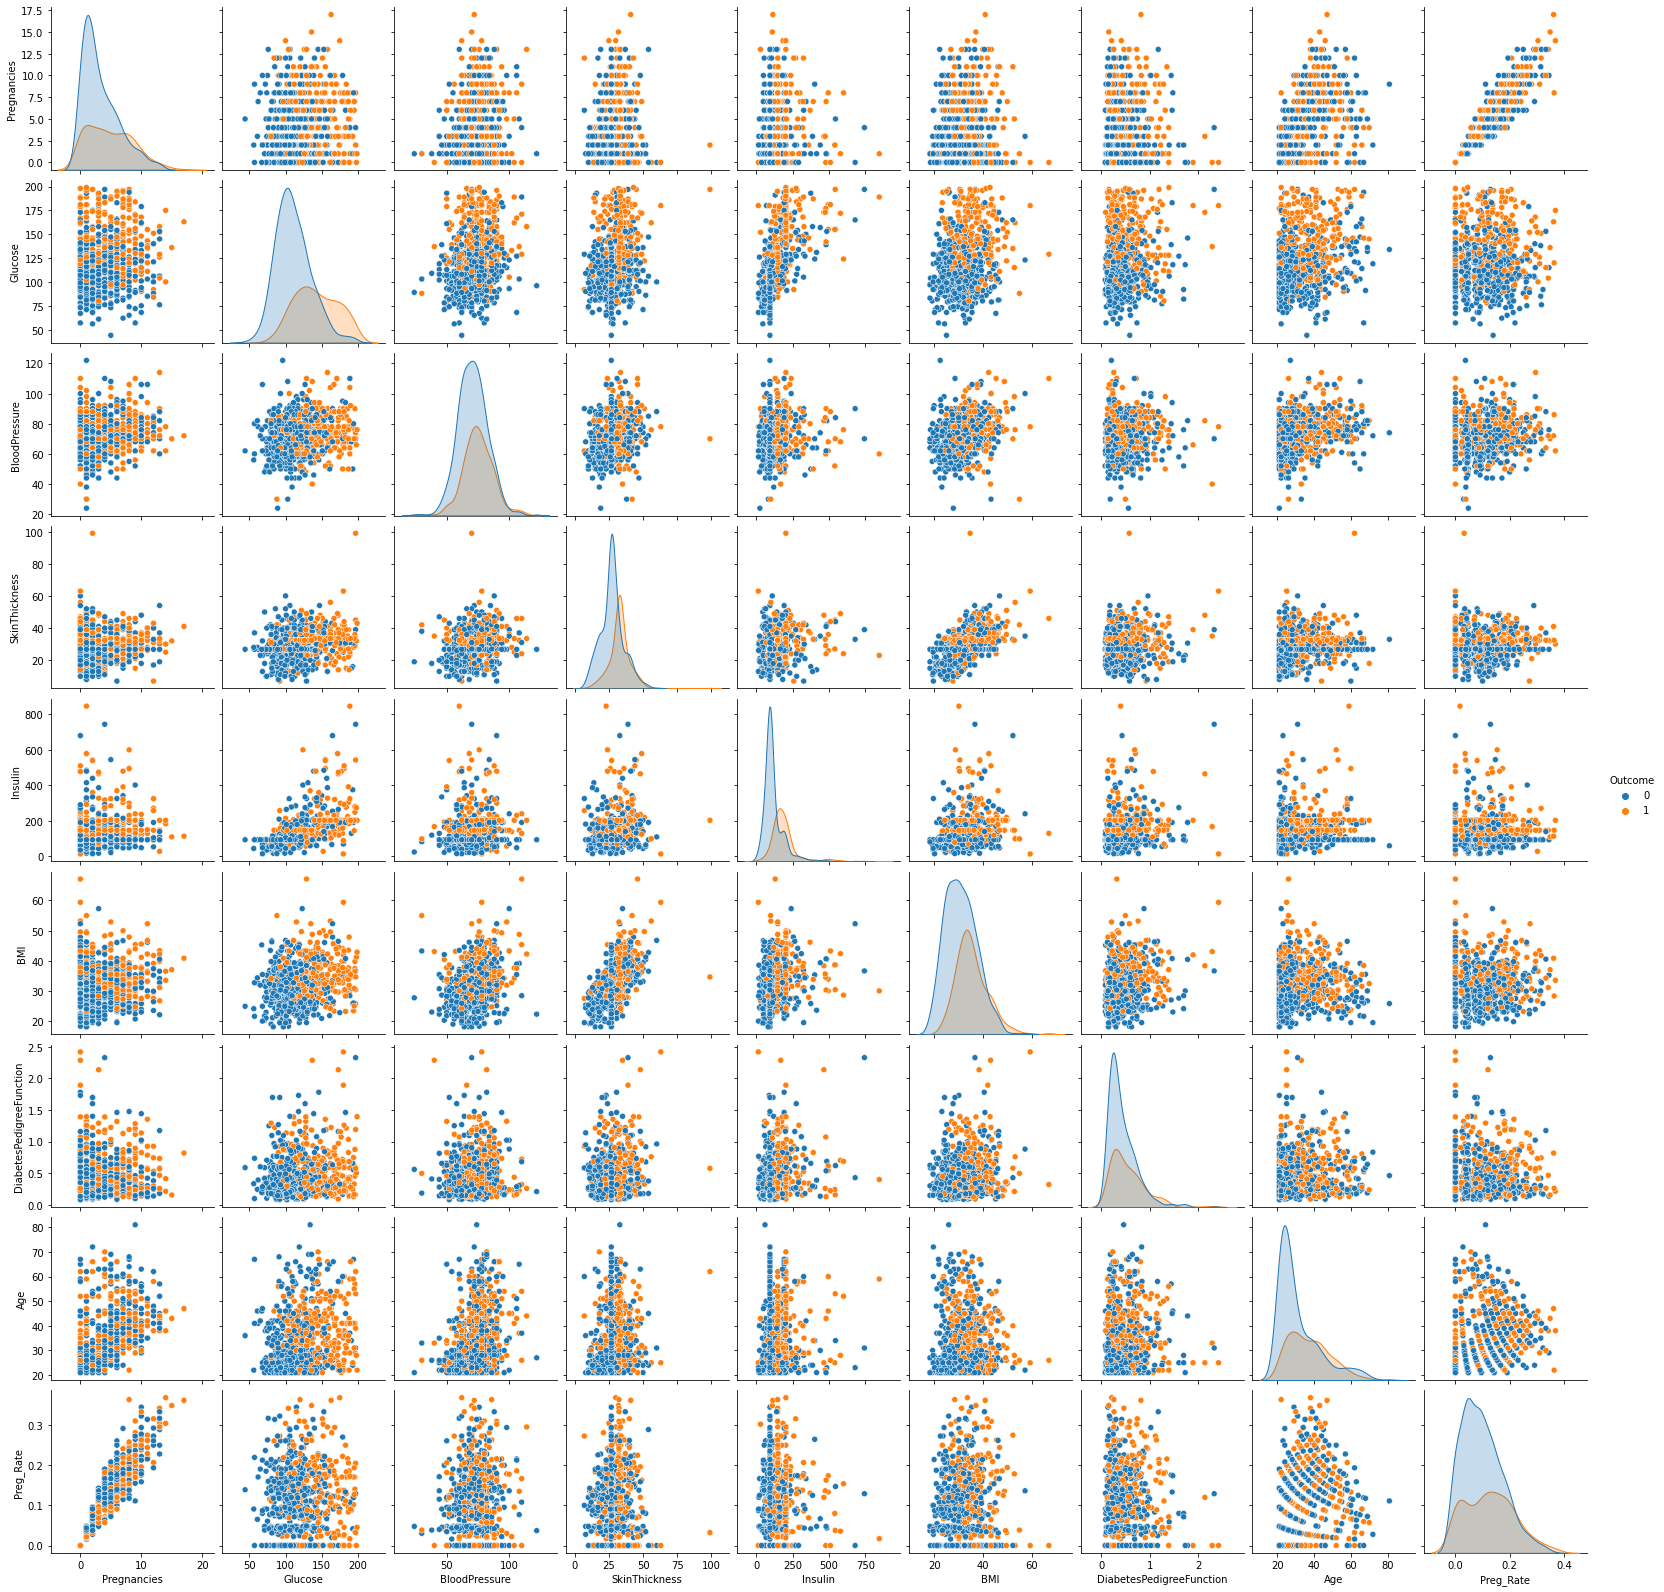

In [24]:
sns.pairplot(df_train,hue='Outcome')

# Normalizing the Quantitative Variables

In [25]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] == 'int64' or df_train.dtypes[f] == 'float64' ]
quantitative.remove('Outcome')
quantitative

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Preg_Rate']

In [26]:
#scaler = StandardScaler() #StandardScaler - RobustScaler
scaler = Normalizer()
df_train[quantitative] = scaler.fit_transform(df_train[quantitative])
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Cat,Preg_Rate,Insulin_Cat,BMI_Cat
0,0.022148,0.546313,0.265774,0.129196,0.751180,0.124028,0.002314,0.184565,1,Prediabetes,0.000443,Abnormal,Obesity
1,0.006604,0.561357,0.435877,0.191522,0.620794,0.175672,0.002318,0.204730,0,Normal,0.000213,Abnormal,Overweight
2,0.027980,0.640045,0.223841,0.117055,0.711744,0.081492,0.002350,0.111920,1,Prediabetes,0.000874,Abnormal,Healthy Weight
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0,Normal,0.000315,Normal,Overweight
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655,1,Normal,0.000000,Abnormal,Obesity


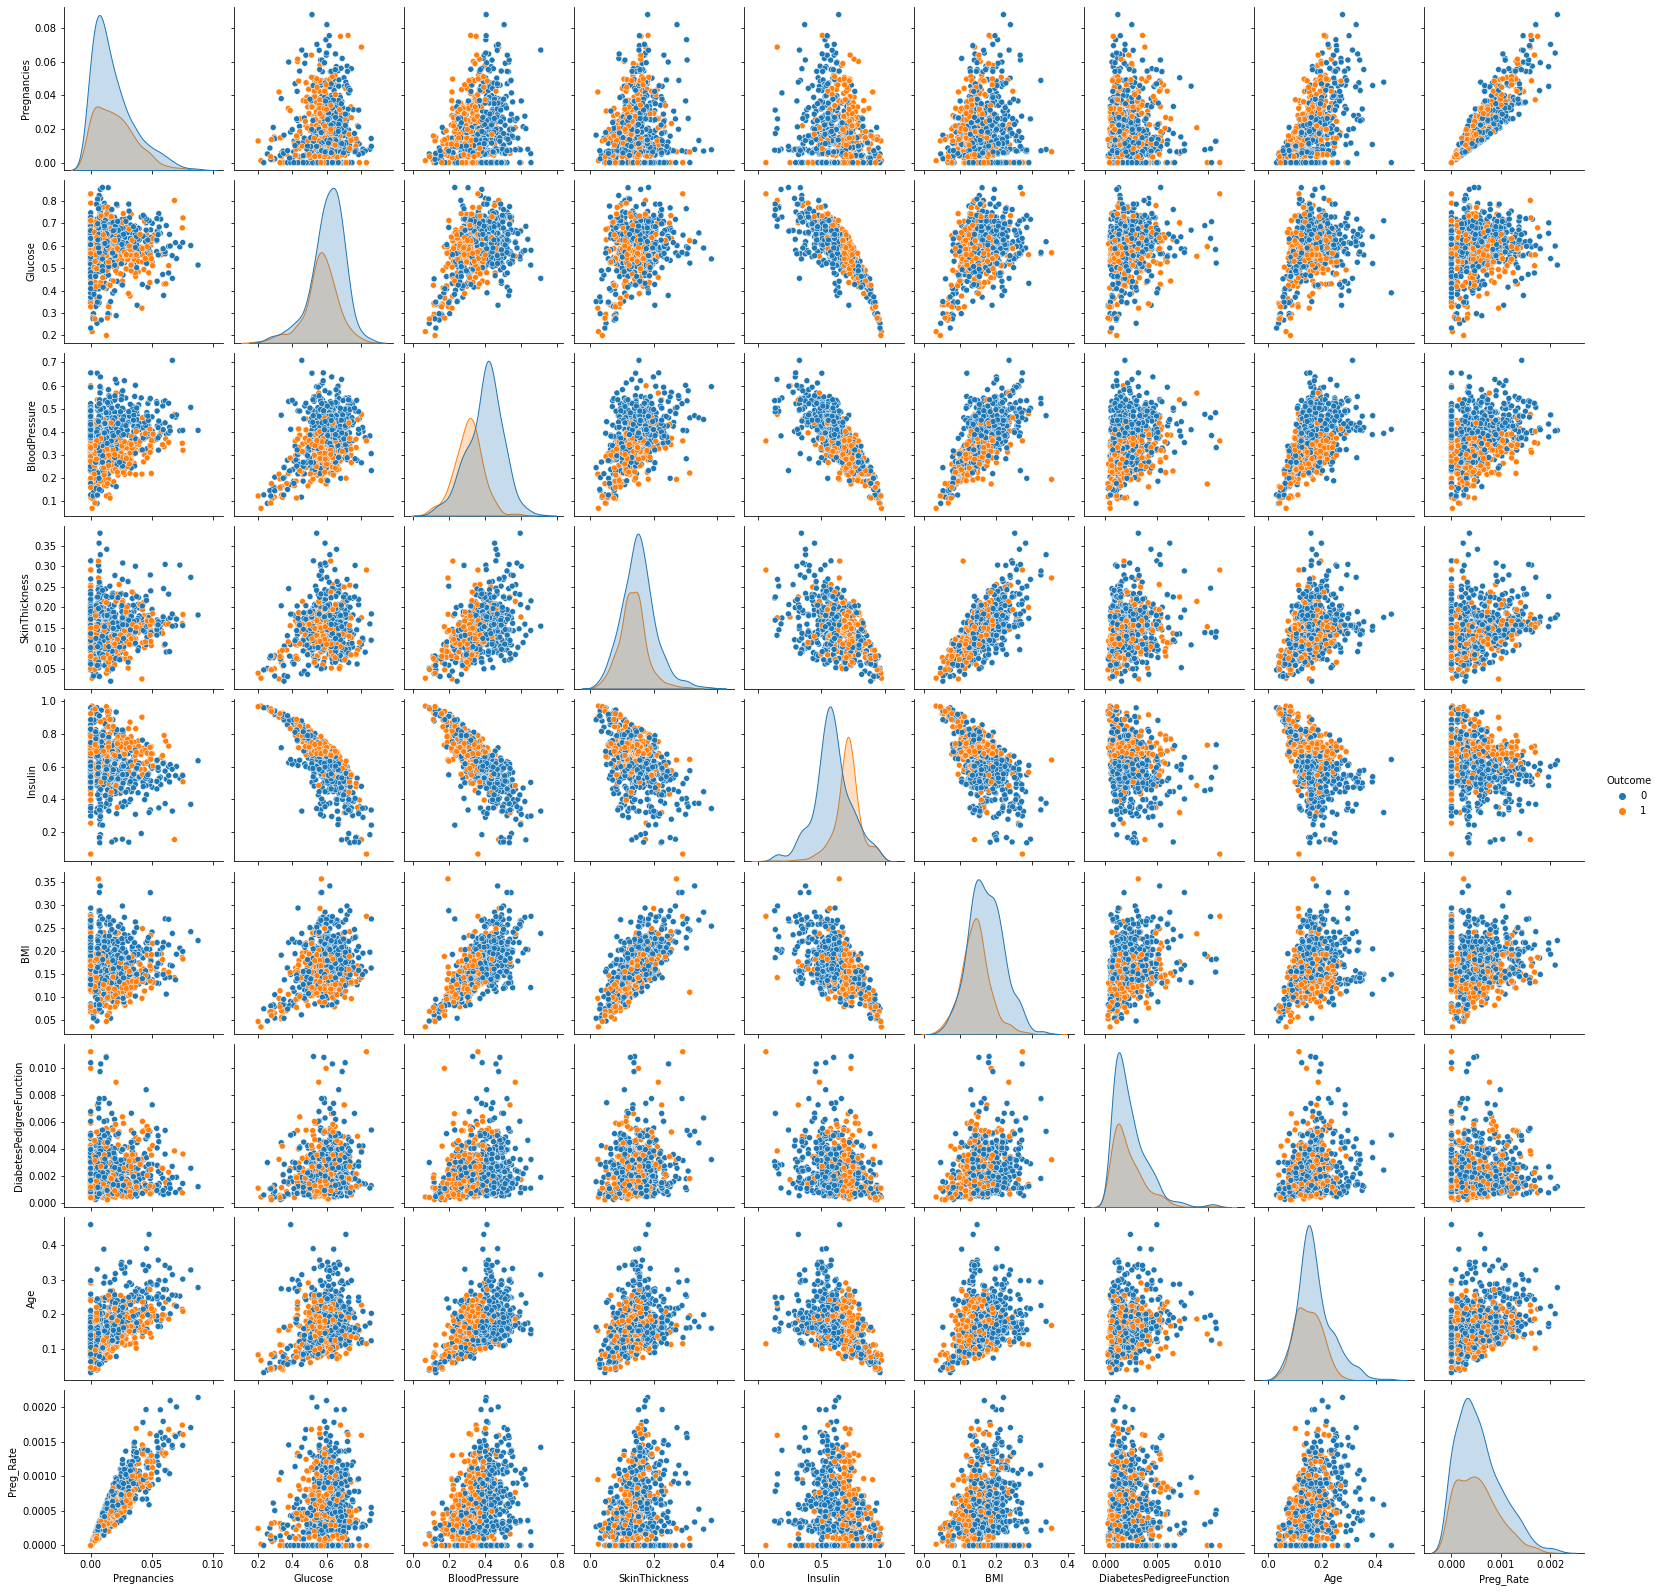

In [27]:
sns.pairplot(df_train,hue='Outcome')

# Encode The Qualitative Variables

In [28]:
qualitative = ['Glucose_Cat',	'Insulin_Cat','BMI_Cat']

In [29]:
df_train[qualitative] = df_train[qualitative].apply(LabelEncoder().fit_transform)

In [30]:
df_train.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
Glucose_Cat                   int64
Preg_Rate                   float64
Insulin_Cat                   int64
BMI_Cat                       int64
dtype: object

In [31]:
quantitative

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Preg_Rate']

In [32]:
df_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose_Cat',
       'Preg_Rate', 'Insulin_Cat', 'BMI_Cat'],
      dtype='object')

# Model Training 

In [33]:
X = df_train.drop('Outcome',axis=1)
X = X.drop('BloodPressure',axis = 1)
X = X.drop('Preg_Rate',axis = 1)                   
y = df_train['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

# Logistic Regression

In [34]:
model = LogisticRegression(max_iter= 300)
model.fit(X_train,y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print(accuracy_score(y_train, train_predictions))
print(accuracy_score(y_test, test_predictions))

0.7263843648208469
0.8181818181818182


In [35]:
confusion_matrix(y_test, test_predictions)

array([[92,  7],
       [21, 34]])

In [36]:
precision_score(y_test, test_predictions)

0.8292682926829268

In [37]:
recall_score(y_test, test_predictions)

0.6181818181818182

In [38]:
f1_score(y_test, test_predictions)

0.7083333333333334

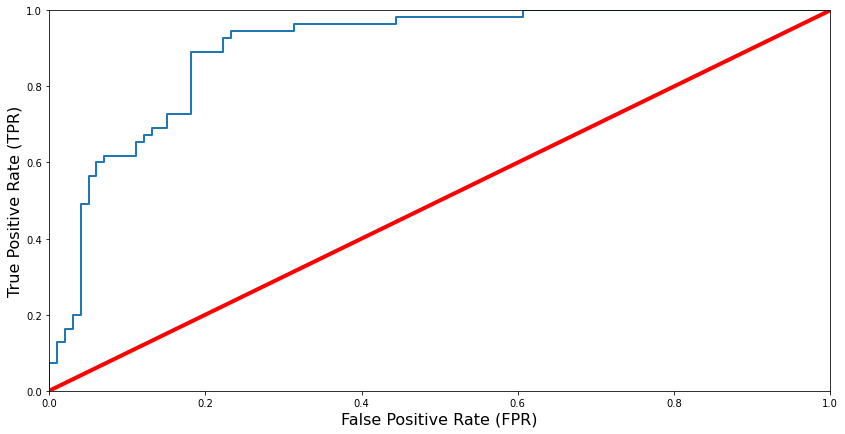

In [39]:
logreg_prob= model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, logreg_prob)
def plot_roc_curve(false_positive_rate, true_positive_rate):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.figure(figsize=(14, 7))
plt.plot([0, 1], [0, 1], 'r', linewidth=4)

plot_roc_curve(false_positive_rate, true_positive_rate)

In [40]:
r_a_score = roc_auc_score(y_test, logreg_prob)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8977043158861341


# KNN

In [41]:
#Fit the KNN model
K=3
knn= KNeighborsClassifier(K)
knn.fit(X_train , y_train)
y_pred_sklearn = knn.predict(X_train)
print(f'The Training accuracy is {accuracy_score(y_train, y_pred_sklearn)}')
y_pred_sklearn = knn.predict(X_test)
print(f'The Testing accuracy is {accuracy_score(y_test, y_pred_sklearn)}')

The Training accuracy is 0.8908794788273615
The Testing accuracy is 0.8246753246753247


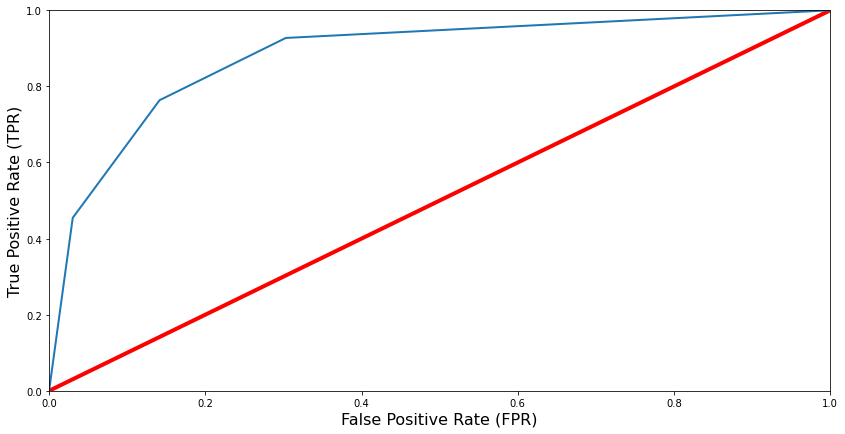

In [42]:
logreg_prob= knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, logreg_prob)
def plot_roc_curve(false_positive_rate, true_positive_rate):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.figure(figsize=(14, 7))
plt.plot([0, 1], [0, 1], 'r', linewidth=4)

plot_roc_curve(false_positive_rate, true_positive_rate)

In [43]:
r_a_score = roc_auc_score(y_test, logreg_prob)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8828282828282829


# SVM

In [44]:
model = SVC(C = 0.5,kernel='linear',gamma='auto')
model.fit(X_train, y_train)
y_predict = model.predict(X_train)
print(f'The Training accuracy is {accuracy_score(y_train, y_predict)}')
y_pred_sklearn = model.predict(X_test)
print(f'The Testing accuracy is {accuracy_score(y_test, y_pred_sklearn)}')

The Training accuracy is 0.7280130293159609
The Testing accuracy is 0.8116883116883117
